In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.0 Linear regression

$$\large MSE  = (X,h_{\theta}) = \frac{1}{m}\sum_{i=1}^m (\theta^T \cdot X^{(i)}-y^{(i)})^2$$
$$\large \hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$$

In [7]:
x = 2* np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)

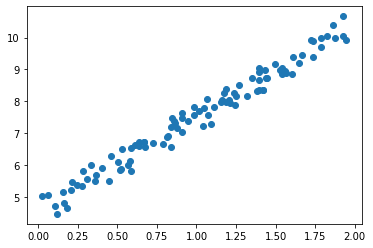

In [9]:
plt.scatter(x,y)
plt.show()

$$\large \hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$$

In [15]:
x_b = np.c_[np.ones((100,1)),x]
#x_b
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b. T).dot(y)

In [16]:
theta_best # best  4 & 3

array([[4.62774472],
       [2.88844856]])

In [22]:
x_array = np.array([[0],[2]])
x_array_b = np.c_[np.ones((2,1)),x_array]
y_pre = x_array_b.dot(theta_best)
y_pre

array([[ 4.62774472],
       [10.40464184]])

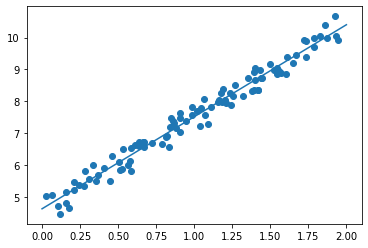

In [25]:
plt.plot(x_array,y_pre)
plt.scatter(x,y)
plt.show()

# We try to use sk model

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pre_sk = lin_reg.predict(x)

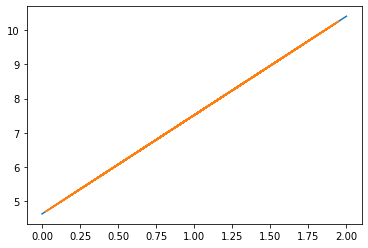

In [28]:
plt.plot(x_array,y_pre)
plt.plot(x,y_pre_sk)
plt.show()

# 2.0 Gradient descent

# Batch Gradient descent, BGD
# 梯度向量 Gradient vector
$$ \large \nabla_\theta MSE (\theta) =  \begin{pmatrix}\frac{	\partial}{\partial \theta_0} MSE(\theta) \\ \frac{	\partial}{\partial \theta_1}MSE(\theta) \\ \vdots \\ \frac{	\partial}{\partial \theta_n}MSE(\theta) \end{pmatrix}  = \frac{2}{m}X^T \cdot (X\cdot\theta-y)$$

# Stochastic Gradient descent , SGD
模拟退火（学习率从大变小） & 学习计划（学习率保持不变）

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change= 50 ,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([4.62593372]), array([2.88913755]))

# Mini-Batch Gradient Descent, MBGD

# 3.0 Polynomial regression

In [34]:
m = 100
x = 6 * np.random.rand(m,1) - 3
y = 0.5 * x **2 +x + 2 + np.random.randn(m,1)

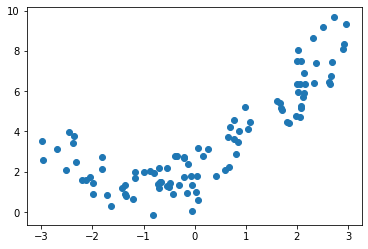

In [36]:
plt.scatter(x,y)
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree= 2 ,include_bias=False)
x_f = poly_f.fit_transform(x)
x_f[0]

array([-1.97880089,  3.91565297])

In [40]:
sk_lin_poly = LinearRegression()
sk_lin_poly.fit(x_f,y)
sk_lin_poly.intercept_,sk_lin_poly.coef_

(array([2.07026083]), array([[1.00643753, 0.45882987]]))

In [41]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split


In [46]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(0,2)
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

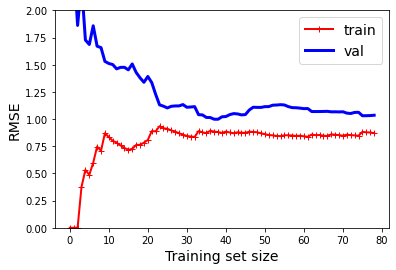

In [47]:
plot_learning_curves(sk_lin_poly,x_f,y)

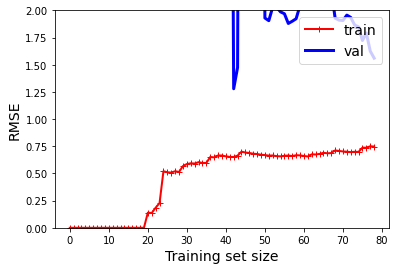

In [48]:
from sklearn.pipeline import Pipeline
poly_whole = Pipeline((
    ("poly_f",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_red",LinearRegression()),
))
plot_learning_curves(poly_whole,x_f,y)

# 4.0 Regularization
### Ridge Regression   岭回归
$$\normalsize J(\theta) = \rm {MSE}(\theta) + \alpha\frac{1}{2} \sum_{i-1}^n \theta_i^2   $$

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1e-7,solver="cholesky")
ridge_reg.fit(x,y)

Ridge(alpha=1e-07, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [69]:
sgd_Ridge = SGDRegressor(penalty="l2")
sgd_Ridge.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

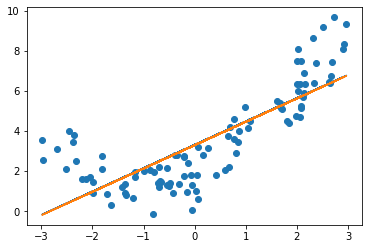

In [72]:
plt.plot(x,ridge_reg.predict(x))
plt.plot(x,sgd_Ridge.predict(x))
plt.scatter(x,y)
plt.show()

### Least Absolute Shrinkage and Selection Operator Regression, LASSO Regression  套索回归
$$\normalsize J(\theta) = \rm {MSE}(\theta) + \alpha \sum_{i-1}^n |\theta_i|   $$

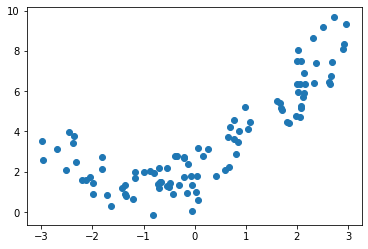

### Elastic Net               弹性网络
$$\normalsize J(\theta) = \rm {MSE}(\theta) + r\alpha \sum_{i-1}^n |\theta_i|  + \alpha\frac{1-r}{2} \sum_{i-1}^n \theta_i^2  $$

### Early stopping

In [93]:
from sklearn.base import clone
sgd_reg = SGDRegressor(n_iter_no_change=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    #print(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


15.075320252403781
12.400519408642353
10.412435508218476
8.943209366054251
7.86462281417643
7.078906631224845
6.511660299920094
6.106400110325568
5.820363233354231
5.6212803092312615
5.484894672925581
5.3930569772295485
5.332263075609708
5.292533218106808
5.266553923268064
5.24902188429248
5.23614315848509
5.22525161047147
5.2145188533677205
5.202734315836138
5.1891389873576
5.173300191753121
5.155017666890611
5.13425348503838
5.111080086702209
5.085642039345811
5.058128162520932
5.028751453179239
4.997734853776755
4.96530137326145
4.931667429613215
4.897038557326502
4.861606833412522
4.825549536055512
4.789028672473961
4.75219110567526
4.7151690804698605
4.678081002588204
4.641032365060706
4.604116746290555
4.567416826858528
4.558149516515748
4.5473254106805605
4.536466596230941
4.525580379514153
4.514671615532001
4.503744992638023
4.492805039989197
4.481856131602243
4.470902490422103
4.459948192389192
4.4489971704898155
4.438053218775738
4.427119996341813
4.416201031251298
4.40529972

5.913210301293442
5.9195631391415615
5.9259109825070935
5.932253816219879
5.938591625344994
5.9449243951811335
5.951252111258876
5.957574759339086
5.963892325411161
5.970204795691488
5.976512156621745
5.982814394867311
5.9891114973156245
5.995403451074561
6.00169024347092
6.007971862048715
6.014248294567682
6.020519529001701
6.0267855535371995
6.033046356571633
6.03930192671193
6.045552252772958
6.051797323776027
6.058037128947323
6.0642716577164535
6.0705008997149354
6.076724844774681
6.082943482926561
6.08915680439891
6.095364799616062
6.101567459196916
6.107764773953461
6.113956734889404
6.120143333198664
6.126324560264006
6.132500407655621
6.138670867129714
6.144835930627107
6.1509955902718785
6.157149838369977
6.16329866740782
6.1694420700510015
6.175580039142878
6.181712567703261
6.187839648927062
6.193961276182963
6.200077443012122
6.20618814312684
6.212293370409255
6.218393118910066
6.224487382847233
6.230576156604655
6.236659434730999
6.242737211938328
6.248809483100917
6.2548

In [89]:
best_epoch,best_model

(199,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=1, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

# 5.0 Logistic Regression

### 逻辑回归模型估算
$${\normalsize \hat{p} = h_{\theta}(x) =\sigma(\theta^{T} \cdot x) } $$
### 逻辑函数 ( sigmod )
$$\sigma(t) = \frac{1}{1+\exp(-t)}$$
### 逻辑回归成本函数（ log损失函数 ）
$$J(\theta= -\frac{1}{m}\sum_{i=1}^m)[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{i})\log(1-\hat{p}^{(i)})]$$

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [14]:
x = iris["data"][:,3:] # petal width
iris["feature_names"]
y = (iris["target"]==2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
t_proba = log_reg.predict_proba(x_new)

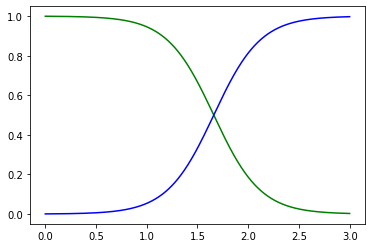

In [22]:
plt.plot(x_new,t_proba[:,0],"g-")
plt.plot(x_new,t_proba[:,1],"b-")
plt.show()

In [23]:
x2 = iris["data"][:,2:]

In [25]:
len(x2)

150

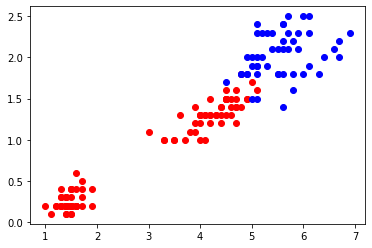

In [29]:
for ii in range(len(x2)):
    if y[ii]== 0:
        plt.scatter(x2[ii,0],x2[ii,1],c= 'red')
    else:
        plt.scatter(x2[ii,0],x2[ii,1],c = 'blue')   
plt.show()

In [30]:
log_reg2 = LogisticRegression()
log_reg2.fit(x2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

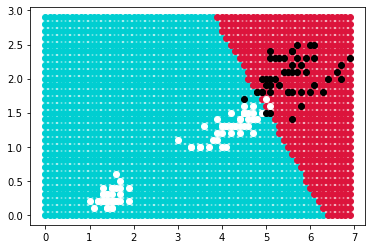

In [39]:
for ii in np.arange(0.0,7.0,0.1):
    for jj in np.arange(0.0,3.,0.1):
        y_ = log_reg2.predict([[ii,jj]])
        if y_ == 0:
            plt.scatter(ii,jj,c= '#00CED1')
        else:
            plt.scatter(ii,jj,c = '#DC143C') 
for ii in range(len(x2)):
    if y[ii]== 0:
        plt.scatter(x2[ii,0],x2[ii,1],c= 'white')
    else:
        plt.scatter(x2[ii,0],x2[ii,1],c = 'black')   
plt.show()

# Softmax 回归（多元逻辑回归）
## softmax 回归模型
$$\normalsize s_k(x) = \theta_k^T\cdot x $$
## softmax函数
$$\hat{p}_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^k\exp(s_j(x))}$$
## 交叉熵成本函数
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^{(i)}\log(\hat{p}_k^{(i)})$$

In [44]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
y3 = iris["target"]
softmax_reg.fit(x2,y3)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
iris['target_names']
y3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<ipython-input-51-efc3e7f28ea8>:20: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
No handles with labels found to put in legend.


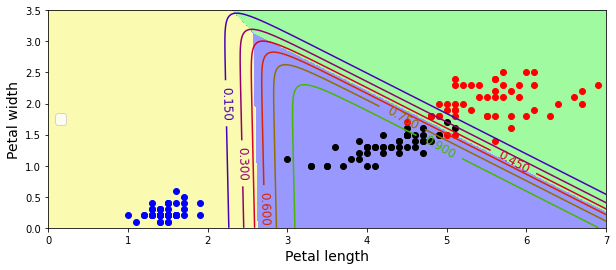

In [51]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))


from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
for ii in range(len(x2)):
    if y3[ii]== 0:
        plt.scatter(x2[ii,0],x2[ii,1],c= 'blue')
    elif y3[ii]== 1:
        plt.scatter(x2[ii,0],x2[ii,1],c = 'black')  
    else:
        plt.scatter(x2[ii,0],x2[ii,1],c = 'red') 
plt.show()